In [25]:
from LightPipes import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import pylab as pl
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_l_x = pd.read_csv("/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/raytracing/m1m2l1-nodecentering--1.5-1.5-0.01.csv", delimiter=' ', index_col=None, header=None )


#angle, beforex, beforey

In [73]:
def one_mirror_with_lens(d_1, d_2, cx1, cy1, rot1, varx1, vary1, f,dx,dy):
    prop1 = np.matrix([[1,0,d_1,0,0], 
                       [0,1,0,d_1,0], 
                      [0,0,1,0,0],
                      [0,0,0,1,0], 
                      [0,0,0,0,1]])
    
    prop2 = np.matrix([[1,0,d_2,0,0], 
                      [0,1,0,d_2,0], 
                      [0,0,1,0,0],
                      [0,0,0,1,0], 
                      [0,0,0,0,1]])
    
    axis = np.matrix([ [1,0,0,0,0],
                      [0,0,1,0,0], 
                      [0,0,np.cos(np.deg2rad(cx1)),0,0], 
                     [0,0,0,np.cos(np.deg2rad(cy1)),0],
                     [0,0,0,0,1]])
    
    rot = np.matrix([ [np.cos(np.deg2rad(rot1)), -np.sin(np.deg2rad(rot1)), 0,0,0], 
                     [np.sin(np.deg2rad(rot1)), np.cos(np.deg2rad(rot1)), 0,0,0], 
                    [0,0,np.cos(np.deg2rad(rot1)), -np.sin(np.deg2rad(rot1)),0],
                    [0,0,np.sin(np.deg2rad(rot1)), np.cos(np.deg2rad(rot1)),0],
                    [0,0,0,0,1]])
    
    tilt_mirror = np.matrix([ [1,0,0,0,0], 
                             [0,1,0,0,0],
                             [0,0,1,0, np.tan(2*np.deg2rad(varx1))],
                             [0,0,0,1,np.tan(2*np.deg2rad(vary1))],
                            [0,0,0,0,1]])
    
    lens= np.matrix([ [1,0,0,0,dx], 
                    [0,1,0,0,dy], 
                    [-1/f,0,1,0,0],
                    [0,-1/f,0,1,0],
                    [0,0,0,0,1]])
    
    return(prop2*lens*prop1*axis*rot*tilt_mirror)


x_beam = []
y_beam = []

x_beam_1mm = []
y_beam_1mm = []



angles = np.arange(-1.5,1.51,0.01)
for i in angles:
    vec = np.matrix([[0], [0],[0], [0], [1]])
    t = one_mirror_with_lens(200, 200,45,0,90,i,i,200,0,0)
    t1mm = one_mirror_with_lens(200, 200,45,0,90,i,i,200,10,0)
    pos = t*vec
    pos1mm = t1mm*vec
    y_beam.append(pos.item(1))
    x_beam.append(pos.item(0))
    y_beam_1mm.append(pos1mm.item(1))
    x_beam_1mm.append(pos1mm.item(0))

In [79]:
x_beam_1mm

[17.411579223593257,
 17.362079175449217,
 17.31258092626139,
 17.263084463869937,
 17.213589776116777,
 17.164096850845556,
 17.114605675901654,
 17.06511623913216,
 17.01562852838586,
 16.96614253151324,
 16.916658236366445,
 16.867175630799302,
 16.817694702667282,
 16.768215439827493,
 16.718737830138693,
 16.669261861461223,
 16.61978752165706,
 16.570314798589756,
 16.52084368012445,
 16.471374154127858,
 16.421906208468236,
 16.3724398310154,
 16.322975009640686,
 16.27351173221697,
 16.224049986618624,
 16.174589760721517,
 16.12513104240301,
 16.075673819541933,
 16.02621808001858,
 15.976763811714699,
 15.927311002513466,
 15.877859640299496,
 15.828409712958805,
 15.778961208378819,
 15.729514114448353,
 15.6800684190576,
 15.63062411009812,
 15.581181175462829,
 15.531739603045983,
 15.482299380743171,
 15.432860496451301,
 15.383422938068588,
 15.333986693494541,
 15.284551750629953,
 15.23511809737689,
 15.18568572163868,
 15.136254611319888,
 15.086824754326331,
 15.0373

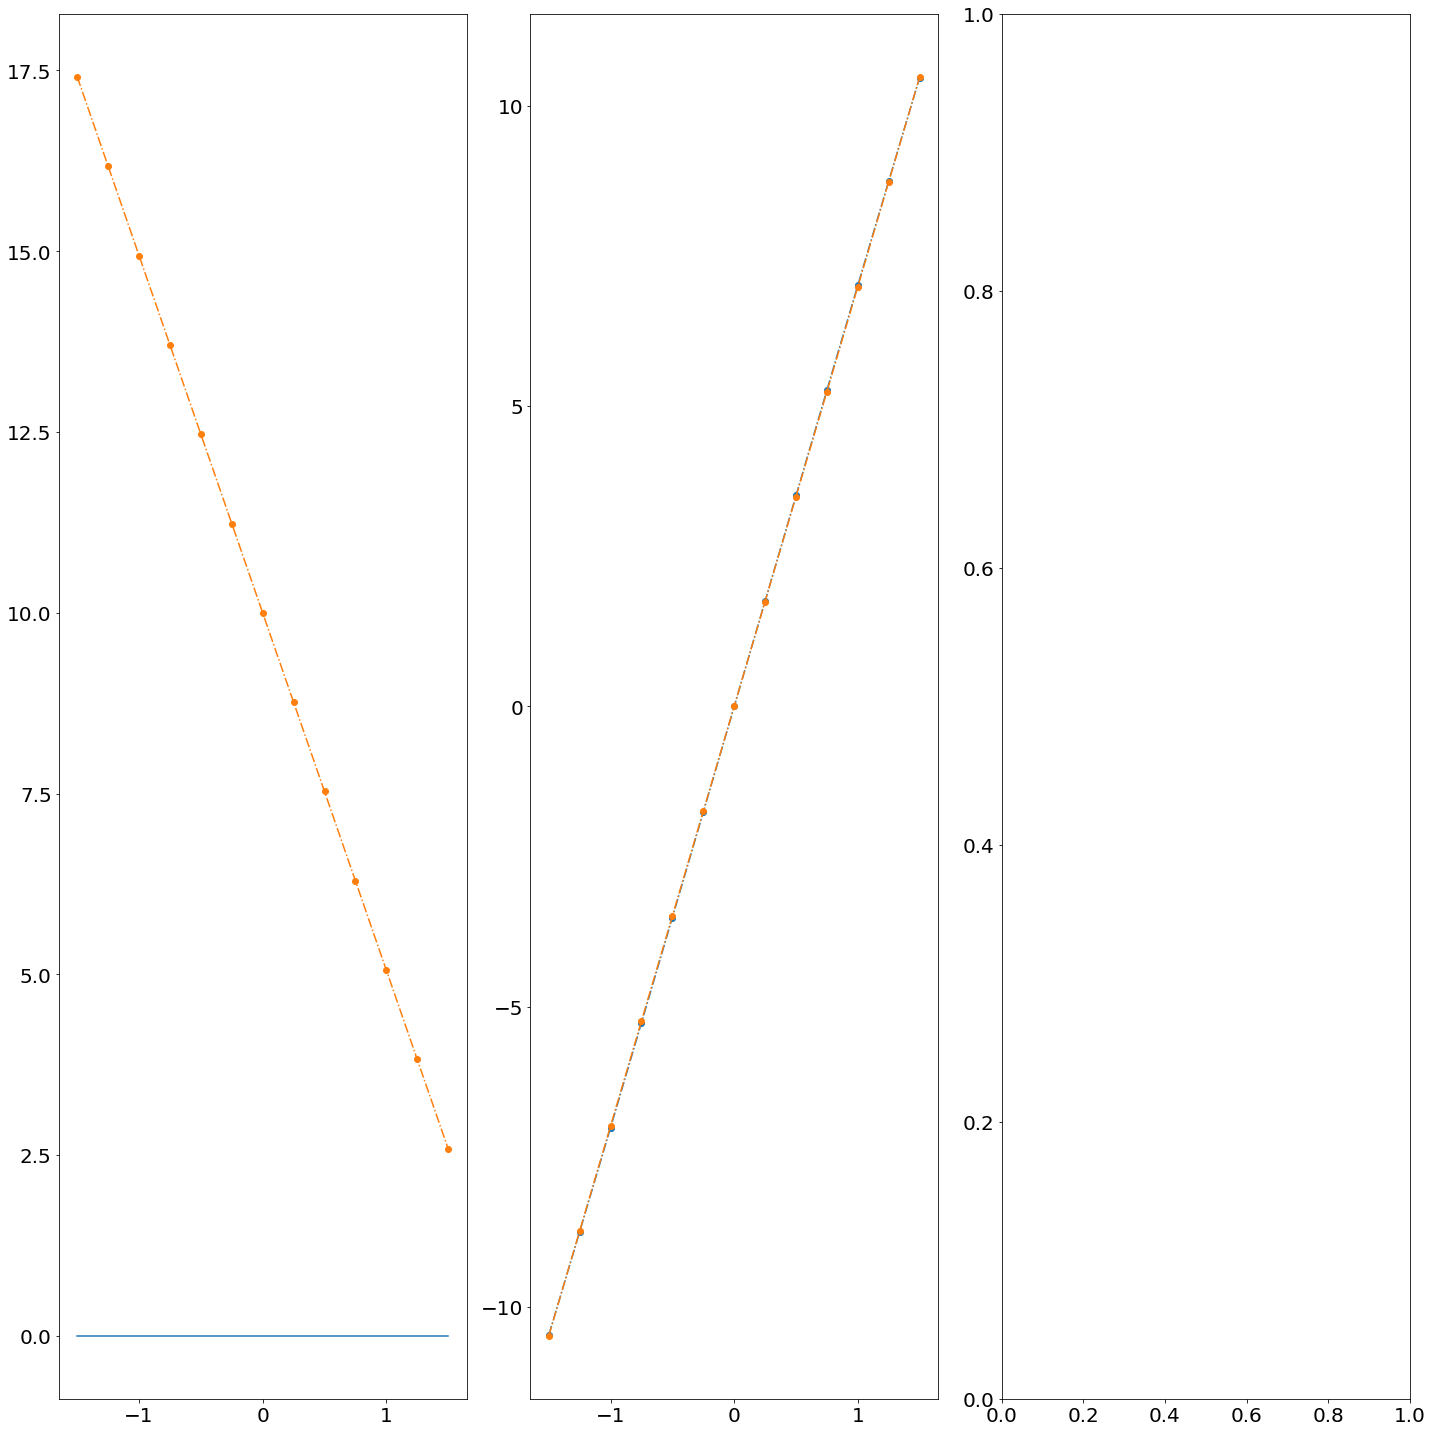

In [85]:
screen = plt.figure(figsize=(20,20))
s1 = screen.add_subplot(131)
s2 = screen.add_subplot(132)
s3 = screen.add_subplot(133)

s1.plot(angles, data_l_x[1])
#s1.plot(x_beam, y_beam)
s1.plot(data_l_x[0], x_beam_1mm, marker= 'o', markevery=25, linestyle ="-.", label = 'data m1-l-1mm')



s2.plot(data_l_x[0], data_l_x[2], marker= 'o', markevery=25, linestyle ="-.", label = 'data m1-l')
s2.plot(data_l_x[0], y_beam_1mm, marker= 'o', markevery=25, linestyle ="-.", label = 'data m1-l-1mm')


s1.tick_params(axis='both', labelsize=20)
s2.tick_params(axis='both', labelsize=20)
s3.tick_params(axis='both', labelsize=20)


screen.tight_layout()